## 七月在线机器学习实训营三期第七周(机器学习-模型调优与融合)考试
#### 考试说明:
- 起止时间：请同学在2018年3月23日至3月25日期间完成，最晚提交时间本周日（3月25日24时之前）结束，<b>逾期不接受补考,该考试分数计入平时成绩</b>
- 考试方式：请同学<font color=red><b>拷贝</b></font>该试卷至自己姓名的目录后，将文件更名为同学姓名拼音-exam7后，进行作答。例如wangwei-exam7
- 提交格式：请同学新建自己姓名全拼的文件夹，将该试卷，数据文件，zip文件等相关考试文件，放置此目录下。将该目录<b>移动</b>至/0.Teacher/Exam/7/目录下
- 注意事项：为确保同学们真正了解自身对本周课程的掌握程度，<font color=red><b>请勿翻阅，移动，更改</b></font>其它同学试卷。如发现按0分处理
- 请同学在下方同学姓名处填写自己的姓名，批改人和最终得分不用填写

- 同学姓名:<u>张少洋</u>  
- 批改人： David
- 最终得分:100

<center><h1>####答卷开始####</h1></center>
<hr>

## 简答题(共6题，1，2题每题5分，后4题每题10分，共计50分)

- note: 完美  50分

#### 1. 机器学习任务中，通常会将给定数据切分为训练集，验证集，测试集，请回答这三类数据集各自的用途。

数据分为两大类，一类是有标签的，一类是无标签的。有监督学习的数据都是有标签的，有监督学习的数据可分为训练集，验证集，测试集。
- 训练集：学习样本数据集，用来估计模型；
- 验证集：用来对估计出来的模型进行调参，从而找到最优参数和最优模型，例如利用网格搜索交叉验证来进行参数的选择；
- 测试集：用来检验最终选择最优的模型的性能如何。

#### 2.如何将数据转换成xgboost内置用法的libsvm数据格式，以及该格式数据是如何解读的?

#### 转换方式
使用xgboost内置的xgboost.DMatrix类将数据转换成libsvm的数据格式，xgboost.DMatrix(data)，例如xgb.DMatrix('../data/agaricus.txt.train')
#### 如何解读
数据格式如下<br>

[label] [index1]:[value1] [index2]:[value2] …

[label] [index1]:[value1] [index2]:[value2] …

- label 是类别；
- index 是特征的索引；
- value 是特征值。

#### 3. 对于自动特征选择，通常有哪三类方法？试写出每类方式的思想，以及在sklearn中的代码实现（面试题）

#### (1)单变量特征选择
单变量的特征选择是通过基于单变量的统计测试来选择最好的特征。它可以当做是评估器的预处理步骤。sklearn将特征选择的内容作为实现了 transform 方法的对象，例如：
- SelectKBest 选择评分最高的 K 个特征
- SelectPercentile 选择用户指定的最高得分百分比的特征
- GenericUnivariateSelect 允许使用可配置方法来进行单变量特征选择。它允许超参数搜索评估器来选择最好的单变量特征（默认mode='percentile'）

以上三种对象将得分函数作为输入，返回单变量的得分和 p 值。得分函数即判定得分高低的依据，得分函数包括：
- 对于回归: f_regression , mutual_info_regression
- 对于分类: chi2（卡方统计） , f_classif（ANOVA F检验） , mutual_info_classif（估计离散目标变量的互信息）


In [2]:
#代码实现
#1.SelectKBest
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

iris = load_iris()
X, y = iris.data, iris.target
X_new = SelectKBest(chi2, k=2).fit_transform(X, y) #k=2 Number of top features to select. 
print(X.shape)
print(X_new.shape)

(150, 4)
(150, 2)


In [3]:
#2.SelectPercentile
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
 X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 10% of features:
select = SelectPercentile(percentile=50) #SelectPercentile 移除除了用户指定的最高得分百分比之外的所有特征
select.fit(X_train, y_train)
# transform training set:
X_train_selected = select.transform(X_train)

print(X_train.shape)
print(X_train_selected.shape)
#最终选择了得分最高的前50%的特征

(284, 80)
(284, 40)


In [9]:
#代码实现
#3.GenericUnivariateSelect
from sklearn.datasets import load_iris
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import chi2

iris = load_iris()
X, y = iris.data, iris.target
#X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new = GenericUnivariateSelect(score_func = chi2,mode = 'k_best', param=2).fit_transform(X, y)
print(X.shape)
print(X_new.shape)

(150, 4)
(150, 2)


#### (2)基于模型的特征选择
SelectFromModel 是一个 meta-transformer（元转换器） ，它可以用来处理任何带有 coef_ 或者 feature_importances_ 属性的训练之后的评估器。 如果相关的``coef_`` 或者 featureimportances 属性值低于预先设置的阈值，这些特征将会被认为不重要并且移除掉。除了指定数值上的阈值之外，还可以通过给定字符串参数来使用内置的启发式方法找到一个合适的阈值。可以使用的启发式方法有 mean 、 median 以及使用浮点数乘以这些（例如，0.1*mean ）。
- 基于 L1 的特征选取<br>
Linear models 使用 L1 正则化的线性模型会得到稀疏解：他们的许多系数为 0。 当目标是降低使用另一个分类器的数据集的维度， 它们可以与 feature_selection.SelectFromModel 一起使用来选择非零系数。特别的，可以用于此目的的稀疏评估器有用于回归的 linear_model.Lasso , 以及用于分类的 linear_model.LogisticRegression 和 svm.LinearSVC
- 基于 Tree（树）的特征选取<br>
基于树的 estimators可以用来计算特征的重要性，然后可以消除不相关的特征（当与 sklearn.feature_selection.SelectFromModel 等元转换器一同使用时）

In [18]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

iris = load_iris()
X, y = iris.data, iris.target
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print(X.shape)
print(X_new.shape)

(150, 4)
(150, 3)


In [16]:
#代码实现
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

select.fit(X_train, y_train)
X_train_select = select.transform(X_train)
print(X_train.shape)
print(X_train_select.shape)

(284, 80)
(284, 40)


#### (3)递归式特征消除
给定一个外部的估计器，可以对特征赋予一定的权重（比如，线性模型的相关系数），recursive feature elimination ( RFE ) 通过考虑越来越小的特征集合来递归的选择特征。 首先，评估器在初始的特征集合上面训练并且每一个特征的重要程度是通过一个 coef_ 属性 或者 feature_importances_ 属性来获得。 然后，从当前的特征集合中移除最不重要的特征。在特征集合上不断的重复递归这个步骤，直到最终达到所需要的特征数量为止。 RFECV 在一个交叉验证的循环中执行 RFE 来找到最优的特征数量

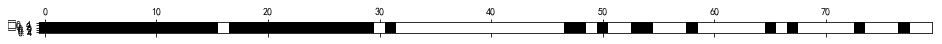

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
#select = RFE(LogisticRegression(penalty="l1"), n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [33]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
select.score(X_test, y_test)  #Reduce X to the selected features and then return the score of the underlying estimator.

0.9508771929824561

In [34]:
LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

0.9508771929824561

In [35]:
print(X_test_rfe.shape)
print(X_test.shape)

(285, 40)
(285, 80)


#### 4.网格搜索交叉验证的作用是什么，并简述网格搜索交叉验证是如何运行的？ 

#### 作用：
网格搜索交叉验证的作用是结合网格搜索的原理和交叉验证的原理来选择模型的最优参数。交叉验证是以比较高的可信度去评估模型本组参数的效果，网格搜索通过遍历所有候选参数去选择模型的参数，通过以上两个阶段去选择最优参数。网格搜索交叉验证在sklearn中用的是sklearn.model_selection.GridSearchCV。

#### 网格搜索交叉验证的运行原理：
- 1.准备好参数网格字典，该网格字典是所有参数的候选列表；
- 2.取定一组参数，然后利用交叉验证，对每折验证集的评价结果取平均，并把该结果作为本组参数的评价结果；
- 3.遍历所有的参数组合，选出参数评价结果最好的一组参数作为最优的参数组合，从而得到最好的得分和最优模型；
- 4.利用上述得到的最优模型在测试集上进行预测评估。

以上过程是并行的，GridSearchCV 内部实现了并行，数据是共享的，也可以指定使用多少个核。




#### 5.工业界上模型整合有三大类方式？试简述每类方式其思想？（面试题）

#### (1)集体智慧(投票器/BAGGING/随机森林（样本特征随机）
- Voting投票器：单个模型很难控制过拟合，采取多数表决的方式，少数服从多数。
- bagging：
    - 从样本集中重采样（有重复的）选出n个样本；
    - 在所有特征上，对这n个样本建立基本分类器，分类器之间要有差异度；
    - 重复以上两步m次，即获得m个分类器；
    - 将数据喂给这m个分类器，最后根据这m个分类器的投票结果，决定数据属于哪一类。
- 随机森林：在bagging基础上做了修改，对样本和特征都随机选取。
    - 从样本集中有放回地抽样，选出n个样本；
    - 从所有特征中随机选择k个特征，然后选择最佳分割属性作为节点建立CART树；
    - 重复以上两步m次，即建立了m颗CART决策树；
    - 这m颗CART形成随机森林，通过投票表决结果，决定数据属于哪一类。

#### (2)STACKING和BLENDING
- Stacking：用上一层模型输出的结果作为下一层的特征，再学习一个模型；
- Blending：弱化版的stacking，对结果做线性加权，上一层的输出结果作为下一层的特征，然后再喂给一个线性模型（回归问题-LinearRegression；分类问题-LogisticRegression）。

#### (3)BOOSTING
- Boosting是基于参差进行学习，逐步缩小残差；
- 每一步产生一个弱预测模型，并加权累加到总模型中；
- 如果每一步的弱预测模型生成都是依据损失函数的梯度方向，则称之为梯度提升；
- 核心理论意义：如果一个问题存在弱分类器，则可以通过提升的办法得到强分类器。


#### 6.  我们可以将xgboost的中众多参数分类为哪三类？请写出哪些参数可以用什么方式用来控制过拟合？

#### 总共有3类参数：

- 通用参数/general parameters：通用参数和模型本身无关，属于全局的一个设定，例如：booster [default=gbtree]（常用）、silent [default=0]（0表示输出信息， 1表示安静模式）、nthread（跑xgboost的线程数，默认最大线程数）


- 集成(增强)参数/booster parameters :
    - eta [default=0.3, 可以视作学习率]
    - gamma [default=0, alias: min_split_loss]
    - max_depth [default=6]
    - min_child_weight [default=1]
    - 等等
- 任务参数/task parameters
    - objective [ default=reg:linear ] 这个参数定义需要被最小化的损失函数。最常用的值有"reg:linear"（回归）、"reg:logistic"（二分类）、"multi:softmax" （多分类）等等；
    - eval_metric [ 默认是根据 损失函数/目标函数 自动选定的 ]评估指标。
    - 等等

#### 控制过拟合方式：
- eat：为防止过拟合，eta通过缩减特征的权重使提升计算过程更加保守；
- gamma：对树的叶子节点做进一步的分割而必须设置的损失减少的最小值，该值越大，算法越保守；
- max_depth：用于设置树的最大深度，每棵树在生长的过程当中所允许达到的最大树深（一般设置成小于9的数比较好）；
- min_child_weight：如果树的生长时的某一步所生成的叶子结点，若该叶子节点上的样本数之和小于min_child_weight，那么可以放弃该步生长；
- subsample：表示观测的子样本的比率，将其设置为0.5意味着xgboost将随机抽取一半观测用于数的生长，这将有助于防止过拟合现象；
- colsample_bytree：表示用于构造每棵树时，对特征进行采样；
- scale_pos_weight：在各类别样本十分不平衡时，对样本少的类别进行加权，增加模型对类别的重视程度。
- 等等

## 实验题(共2题，每题25分，共计50分)

### 1. 使用XGBoost内置方式，导入iris数据完成分类问题（要求以不同参数设置xgboost运行并比对），最后给出实验总结

In [63]:
#!/usr/bin/python
import numpy as np
import xgboost as xgb
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)
watch_list = [(dtest, 'eval'), (dtrain, 'train')]

In [ ]:
#以下对树深和学习率两个参数调参对比，其他参数可参考这种方式，暂且省略其他参数的例子

In [74]:
#固定其他参数，调整树深，观察数据结果
params = [{'max_depth': 2, 'eta': 0.3, 'silent': 1, 'objective': 'multi:softmax', 'num_class': 3},
         {'max_depth': 3, 'eta': 0.3, 'silent': 1, 'objective': 'multi:softmax', 'num_class': 3},
         {'max_depth': 4, 'eta': 0.3, 'silent': 1, 'objective': 'multi:softmax', 'num_class': 3},
         {'max_depth': 6, 'eta': 0.3, 'silent': 1, 'objective': 'multi:softmax', 'num_class': 3}]
for i, param in enumerate(params):
    print ('running'+ str(i))
    bst = xgb.train(param, data_train, num_boost_round=6, evals=watch_list)  #num_boost_round=6 代表进行六轮  
    y_hat = bst.predict(dtest)
    result = y_test.reshape(1, -1) == y_hat
    print ('正确率:\t', float(np.sum(result)) / len(y_hat))

running0
[0]	eval-merror:0.105263	train-merror:0.035714
[1]	eval-merror:0.026316	train-merror:0.026786
[2]	eval-merror:0.026316	train-merror:0.026786
[3]	eval-merror:0.026316	train-merror:0.026786
[4]	eval-merror:0.026316	train-merror:0.026786
[5]	eval-merror:0.026316	train-merror:0.026786
正确率:	 0.9736842105263158
running1
[0]	eval-merror:0.026316	train-merror:0.017857
[1]	eval-merror:0.026316	train-merror:0.017857
[2]	eval-merror:0.026316	train-merror:0.017857
[3]	eval-merror:0.026316	train-merror:0.017857
[4]	eval-merror:0.026316	train-merror:0.017857
[5]	eval-merror:0.026316	train-merror:0.017857
正确率:	 0.9736842105263158
running2
[0]	eval-merror:0.026316	train-merror:0.017857
[1]	eval-merror:0.026316	train-merror:0.017857
[2]	eval-merror:0.026316	train-merror:0.017857
[3]	eval-merror:0.026316	train-merror:0.017857
[4]	eval-merror:0.026316	train-merror:0.017857
[5]	eval-merror:0.026316	train-merror:0.017857
正确率:	 0.9736842105263158
running3
[0]	eval-merror:0.026316	train-merror:0.017

In [78]:
#固定其他参数，调整学习率，观察数据结果
params = [{'max_depth': 3, 'eta': 0.01, 'silent': 1, 'objective': 'multi:softmax', 'num_class': 3},
         {'max_depth': 3, 'eta': 0.1, 'silent': 1, 'objective': 'multi:softmax', 'num_class': 3},
         {'max_depth': 3, 'eta': 0.5, 'silent': 1, 'objective': 'multi:softmax', 'num_class': 3},
         {'max_depth': 3, 'eta': 1, 'silent': 1, 'objective': 'multi:softmax', 'num_class': 3}]
for i, param in enumerate(params):
    print ('running'+ str(i))
    bst = xgb.train(param, data_train, num_boost_round=6, evals=watch_list)  #num_boost_round=6 代表进行六轮  
    y_hat = bst.predict(dtest)
    result = y_test.reshape(1, -1) == y_hat
    print ('正确率:\t', float(np.sum(result)) / len(y_hat))

running0
[0]	eval-merror:0.026316	train-merror:0.017857
[1]	eval-merror:0.026316	train-merror:0.017857
[2]	eval-merror:0.026316	train-merror:0.017857
[3]	eval-merror:0.026316	train-merror:0.017857
[4]	eval-merror:0.026316	train-merror:0.017857
[5]	eval-merror:0.026316	train-merror:0.017857
正确率:	 0.9736842105263158
running1
[0]	eval-merror:0.026316	train-merror:0.017857
[1]	eval-merror:0.026316	train-merror:0.017857
[2]	eval-merror:0.026316	train-merror:0.017857
[3]	eval-merror:0.026316	train-merror:0.017857
[4]	eval-merror:0.026316	train-merror:0.017857
[5]	eval-merror:0.026316	train-merror:0.017857
正确率:	 0.9736842105263158
running2
[0]	eval-merror:0.026316	train-merror:0.017857
[1]	eval-merror:0.026316	train-merror:0.017857
[2]	eval-merror:0.026316	train-merror:0.017857
[3]	eval-merror:0.026316	train-merror:0.008929
[4]	eval-merror:0.026316	train-merror:0.008929
[5]	eval-merror:0.026316	train-merror:0.008929
正确率:	 0.9736842105263158
running3
[0]	eval-merror:0.026316	train-merror:0.017

### 总结：
- #### 固定其他参数，调整树深 
    - 'max_depth'的值是2时，测试集和验证集的错误率在第二轮迭代开始就趋向于稳定
    - 'max_depth'能够防止过拟合的上限是3
- #### 固定其他参数，调整学习率，仅从以上结果发现：在该样本量的前提下，学习率的大小对该模型没有太大的影响


### 2. 使用XGBoost的sklearn接口，对KaggleCredit2数据完成信用卡欺诈项目的建模及分析（要求以不同参数设置xgboost运行并比对），最后给出实验总结

- KaggleCredit2数据文件 位于/home/sxy-s3/0.Teacher/Exam/KaggleCredit2.csv.zip，请勿复制或移动该文件

In [10]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('/home/sxy-s3/0.Teacher/Exam/KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [11]:
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']

In [12]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
y.mean()

0.06742876076872101

In [13]:
#切分数据集
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = 0.7)

In [14]:
param_grid = {'learning_rate': [0.1,0.3,0.5], 
              'n_estimators': [3,3,3], 
              'max_depth': [2,3,5], 
              'min_samples_leaf':[2,3,1]}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)

In [15]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [3, 3, 3], 'learning_rate': [0.1, 0.3, 0.5], 'max_depth': [2, 3, 5], 'min_samples_leaf': [2, 3, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
grid_search.score(x_test, y_test)

0.9341923607915325

In [17]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_estimators': 3, 'learning_rate': 0.3, 'max_depth': 2, 'min_samples_leaf': 2}
0.9353740154891983


In [18]:
grid_search.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=3, presort='auto',
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

- note:如果能加上对调整参数，如果树深等参数，对结果的影响的分析会更棒~

#### 总结：
- 在给定的参数列表中，最优参数：{'n_estimators': 3, 'learning_rate': 0.3, 'max_depth': 2, 'min_samples_leaf': 2}
- 在上述的参数组合条件下，5折交叉验证的最优评分是：0.9353740154891983

### 本阶段课程意见反馈题(非必答，不送分)
#### 请同学围绕以下两点进行回答：
- 自身总结：请您对您自己在本周课程的学习，收获，技能掌握等方面进行一次总结 ，也包括有哪些方面存在哪些不足，欠缺，困惑。作为将来回顾学习路径时的依据。


- 收获：到此为止，机器学习的算法较上周有更深刻的认识，并且学习了几个数据科学比赛的案例，对特征工程和特征提起也有了更深刻的认识；
- 欠缺：需要学习的东西还很多。

- 课程反馈：请就知识点，进度，难易度，教学方式，考试方式及难易度等方面向我们反馈，督促我们进行更有效的改进。

给寒老师的教学点赞

<hr>
<center><h1>####答卷结束####</h1></center>